# **Tutorial 3: Prediksi Metal**

Seperti biasa, import dulu package yang diperlukan. 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_validate

Panggil dataset kita dan assign ke suatu variable. Di sini, kita assign ke variable df.

In [3]:
df = pd.read_csv("../datasets/is_metal.csv")

In [4]:
print(df.shape)

(4921, 48)


Pisahkan feature dan target. Lalu, bagi dataset jadi training dan test set (di sini kita pakai 80:20)

In [5]:
# Pisahkan fitur dan target
X = df.drop(columns=['composition','is_metal'])
y = df['is_metal']

# Bagi jadi data training dan test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y    # important for classification
)

Sekarang kita bangun model RandomForestClassifier lalu cross-validate menggunakan 5-fold.

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

rf_pipeline = Pipeline([
    ('model', RandomForestClassifier(
        n_estimators=300,
        random_state=42,
        n_jobs=-1
    ))
])

kf = KFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

scoring = ["accuracy", "f1", "roc_auc"]

hasil = cross_validate(
    rf_pipeline,
    X_train, y_train,
    cv=kf,
    scoring=scoring,
    return_train_score=True,
    n_jobs=-1
)

Performa model selama cross-validation

In [7]:
print("CV Accuracy:", hasil["test_accuracy"].mean(),
      "±", hasil["test_accuracy"].std())
print("CV F1:", hasil["test_f1"].mean(),
      "±", hasil["test_f1"].std())

CV Accuracy: 0.9011735756809577 ± 0.011353982476411947
CV F1: 0.9005099141882112 ± 0.013059279677680908


Sekarang, training terakhir dengan methode .fit.

Lalu uji dengan test data.

In [8]:
# Sekarang uji pakai data test
from sklearn.metrics import accuracy_score, f1_score

rf_pipeline.fit(X_train, y_train)
y_test_pred = rf_pipeline.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1:", f1_score(y_test, y_test_pred))

Test Accuracy: 0.917766497461929
Test F1: 0.9174311926605505


Kita bisa melihat performa classifier kita dengan membuat confusion matrix sebagai berikut.

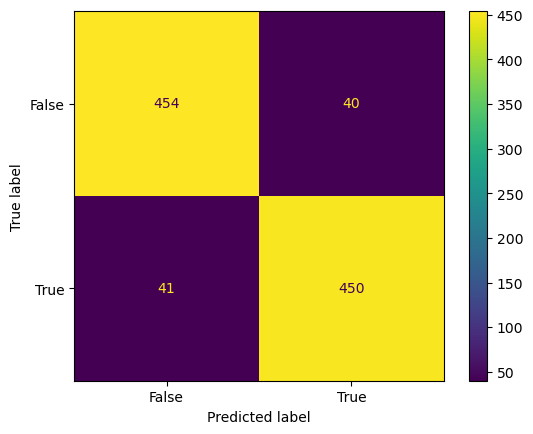

In [9]:
# Evaluasi hasil prediksi
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)
plt.show()

Kita juga bisa melihat prediction probability dari model kita

In [10]:
y_test_proba = rf_pipeline.predict_proba(X_test)[:,1]

In [11]:
proba_metal     = y_test_proba[y_test == 1]   # true metals
proba_nonmetal = y_test_proba[y_test == 0]   # true non-metals

Lalu coba kita plot

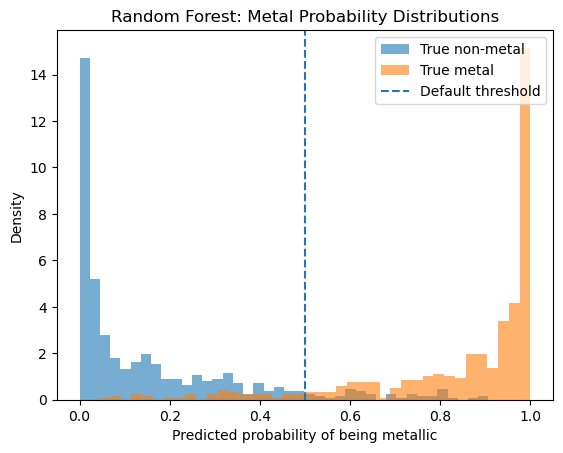

In [12]:
plt.figure()

plt.hist(proba_nonmetal, bins=40, alpha=0.6, density=True,
         label="True non-metal")

plt.hist(proba_metal, bins=40, alpha=0.6, density=True,
         label="True metal")

plt.axvline(0.5, linestyle="--", label="Default threshold")

plt.xlabel("Predicted probability of being metallic")
plt.ylabel("Density")
plt.title("Random Forest: Metal Probability Distributions")
plt.legend()
plt.show()

### **Menyimpan Model yang Sudah Ditraining**

Sama seperti sebelumnya, kita bisa simpan model dengan joblib.

In [13]:
import joblib

In [14]:
# Simpan model
joblib.dump(rf_pipeline, '../models/rf_is_metal_model.joblib')

['../models/rf_is_metal_model.joblib']

In [15]:
joblib.dump(X.columns.tolist(), '../models/rf_is_metal_features.joblib')

['../models/rf_is_metal_features.joblib']